The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.

This is a learning path, so I'll take the help from an existing Kaggle kernel to build it.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
raw_data = pd.read_csv('D:/Data Science/Data/kaggle/Titanic/train.csv')

## Contents of the Notebook:

### Part1: Exploratory Data Analysis(EDA):
1)Analysis of the features.

2)Finding any relations or trends considering multiple features.

### Part2: Feature Engineering and Data Cleaning:
1)Adding any few features.

2)Removing redundant features.

3)Converting features into suitable form for modeling.

### Part3: Predictive Modeling
1)Running Basic Algorithms.

2)Cross Validation.

3)Ensembling.

4)Important Features Extraction

In [3]:
print('Number of Rows: '+str(raw_data.shape[0]))
print('Number of Columns: '+str(raw_data.shape[1]))

Number of Rows: 891
Number of Columns: 12


#### Here's a glipmse of the data

In [4]:
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Part1: Exploratory Data Analysis(EDA):

### Basic question: How many died?

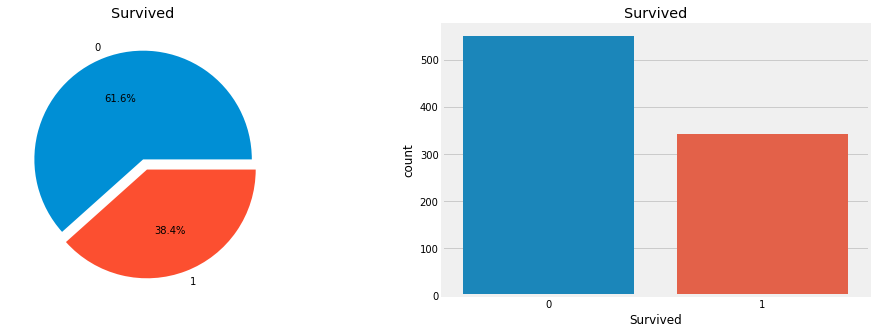

In [5]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
raw_data['Survived'].value_counts().plot.pie(explode=[0,0.1],ax=ax[0],autopct='%1.1f%%')
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(raw_data['Survived'],ax=ax[1])
ax[1].set_title('Survived')
plt.show()

### Any missing data?

In [6]:
raw_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<b>Categorical Features:</b> Sex, Cabin, Embarked, Survived (cabin is mostly null)

<b>Continuous Features:</b> Age 

<b>Oridinal Features:</b> Pclass

<b> Discrete Features:</b> SibSp, Parch

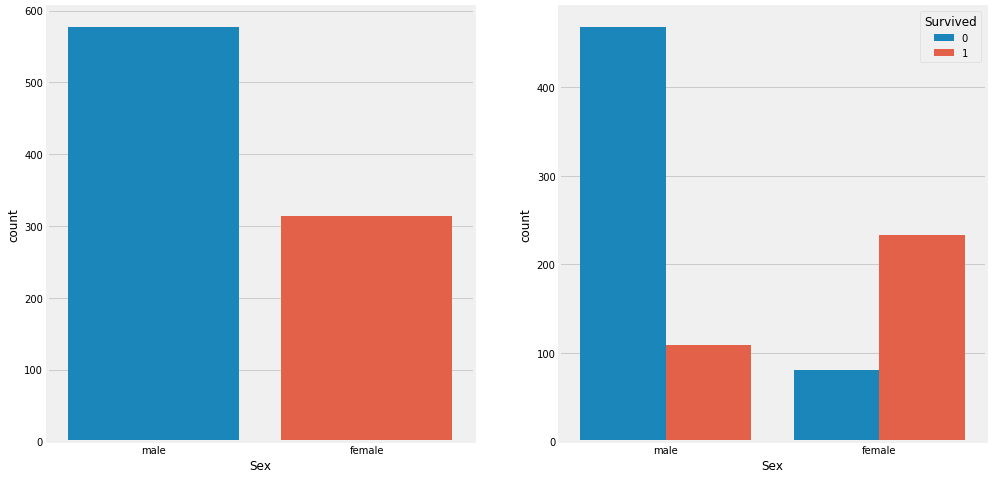

In [8]:
f, ax = plt.subplots(1,2,figsize=(15,8))
sns.countplot(raw_data['Sex'],ax=ax[0])
sns.countplot('Sex',hue='Survived',data=raw_data)
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rates for a women on the ship is around <b>75%</b> while that for men in around <b>18-19%.</b>

This looks to be a very important feature for modeling.

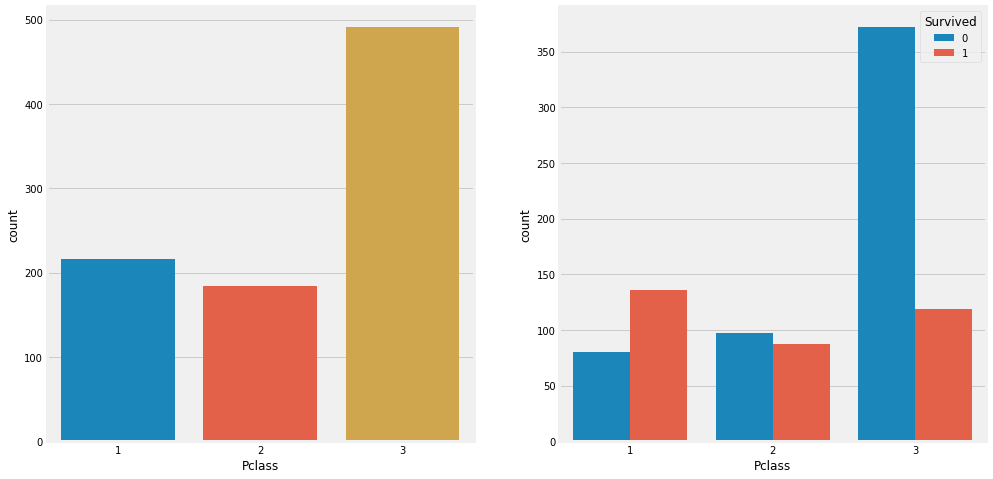

In [9]:
f, ax = plt.subplots(1,2,figsize=(15,8))
sns.countplot(raw_data['Pclass'],ax=ax[0])
sns.countplot('Pclass',hue='Survived',data=raw_data)
plt.show()

People say Money Can't Buy Everything. But we can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1 %survived is around 63% while for Pclass2 is around 48%. So money and status matters. Such a materialistic world.

In [10]:
pd.crosstab([raw_data.Sex,raw_data.Survived],raw_data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

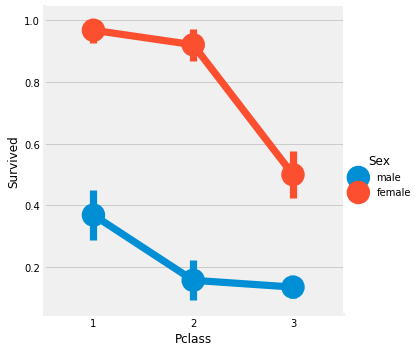

In [11]:
sns.factorplot('Pclass','Survived',hue='Sex',data=raw_data)
plt.show()

We use <b>FactorPlot</b> in this case, because they make the seperation of categorical values easy.

Looking at the <b>CrossTab</b> and the <b>FactorPlot</b>, we can easily infer that survival for Women from <b>Pclass1 is about 95-96%, as only 3 out of 94 Women from Pclass1 died.</b>

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature

In [12]:
print('Youngest Passenger on-board: '+str(raw_data['Age'].min()))
print('Oldest Passenger on-board: '+str(raw_data['Age'].max()))
print('Average Passenger age on-board: '+str(raw_data['Age'].mean()))

Youngest Passenger on-board: 0.42
Oldest Passenger on-board: 80.0
Average Passenger age on-board: 29.69911764705882


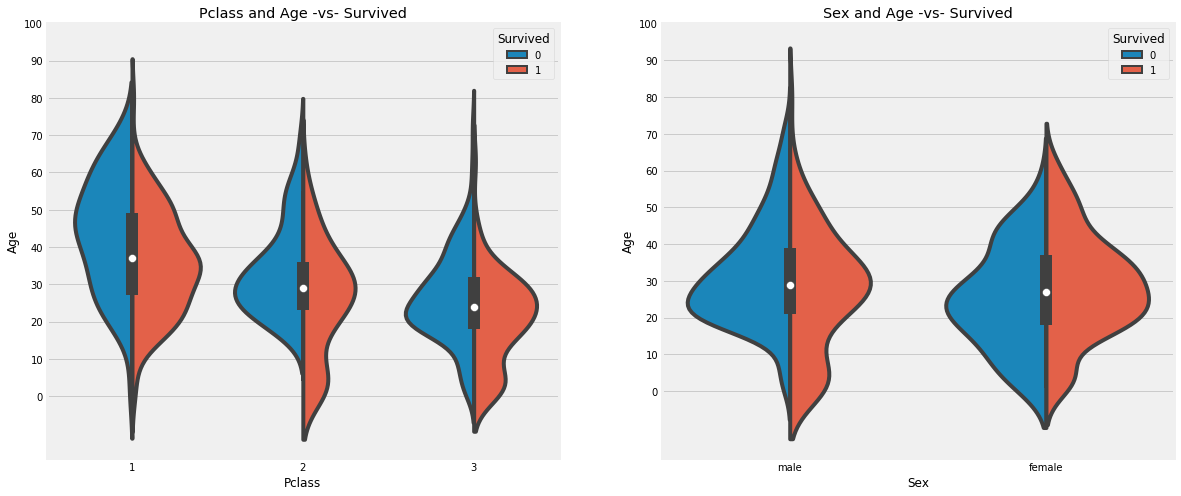

In [13]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',ax=ax[0],data=raw_data,split=True)
ax[0].set_title('Pclass and Age -vs- Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=raw_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age -vs- Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Observations:<br>
1)The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

2)Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.

3)For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

In [14]:
raw_data['Initial']=0
for i in raw_data:
    raw_data['Initial']=raw_data.Name.str.extract('([A-Za-z]+)\.')

In [15]:
raw_data['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [16]:
pd.crosstab(raw_data.Sex,raw_data.Initial)

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
raw_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
raw_data.groupby(['Initial'])['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
raw_data.loc[(raw_data.Age.isnull())&(raw_data.Initial=='Mr'),'Age']=33
raw_data.loc[(raw_data.Age.isnull())&(raw_data.Initial=='Mrs'),'Age']=36
raw_data.loc[(raw_data.Age.isnull())&(raw_data.Initial=='Master'),'Age']=5
raw_data.loc[(raw_data.Age.isnull())&(raw_data.Initial=='Miss'),'Age']=22
raw_data.loc[(raw_data.Age.isnull())&(raw_data.Initial=='Other'),'Age']=46

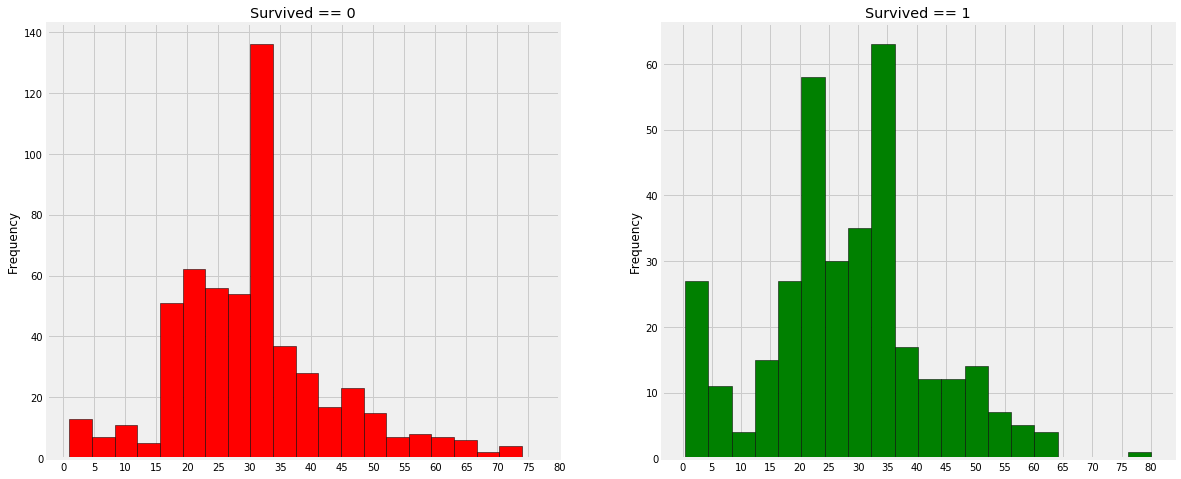

In [20]:
f, ax = plt.subplots(1,2,figsize=(18,8))
raw_data[raw_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
l1 = list(range(0,85,5))
ax[0].set_title('Survived == 0')
ax[0].set_xticks(l1)
raw_data[raw_data['Survived']==1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
l1 = list(range(0,85,5))
ax[1].set_title('Survived == 1')
ax[1].set_xticks(l1)
plt.show()

Observations:

1) Children and Women were given priority <br>
2) Oldest Passenger were rescued <br>
3) Highest Casualty was in the age group 30-40

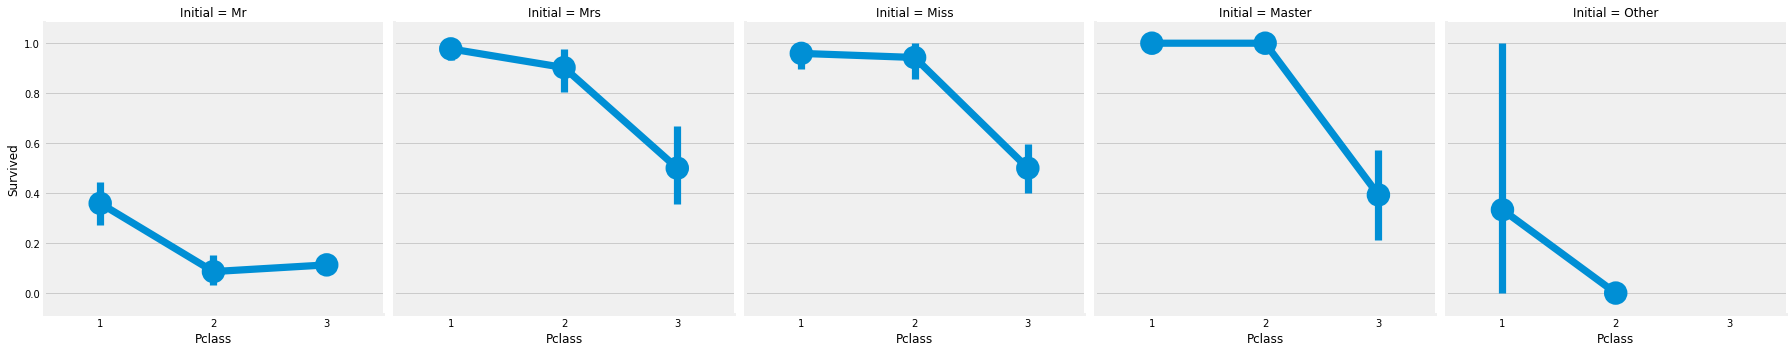

In [21]:
sns.factorplot('Pclass','Survived',col='Initial',data=raw_data)
plt.show()

Confirming that Women and Children First policy was followed irrespective of Pclass

In [22]:
pd.crosstab([raw_data.Embarked,raw_data.Pclass],[raw_data.Sex,raw_data.Survived],margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

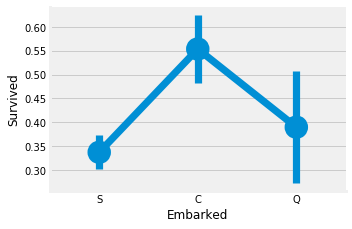

In [23]:
sns.factorplot('Embarked','Survived',data=raw_data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

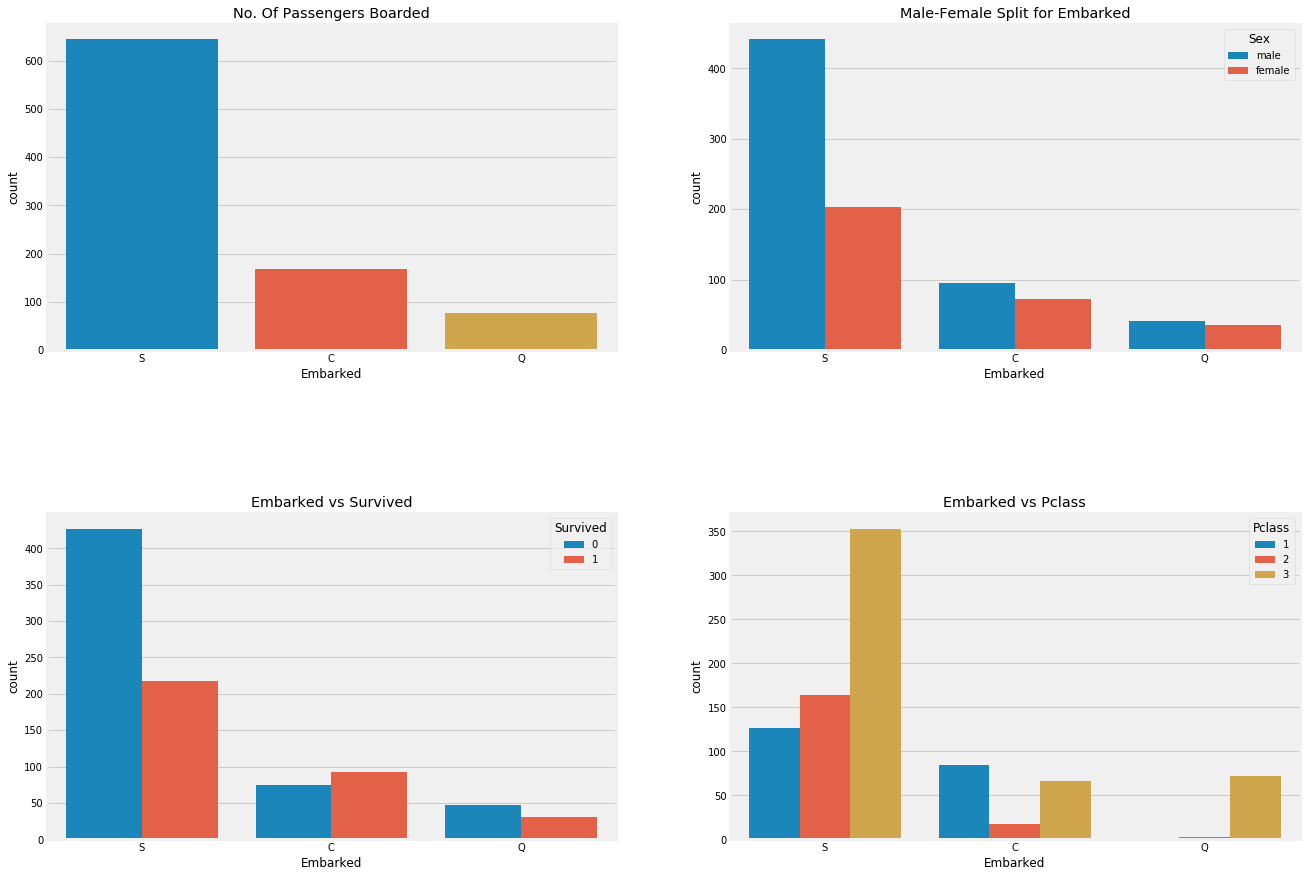

In [24]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=raw_data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=raw_data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=raw_data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=raw_data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [25]:
raw_data['Embarked'].fillna('S',inplace=True)

<b> SibSp </b>

In [26]:
pd.crosstab(raw_data.SibSp,raw_data.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


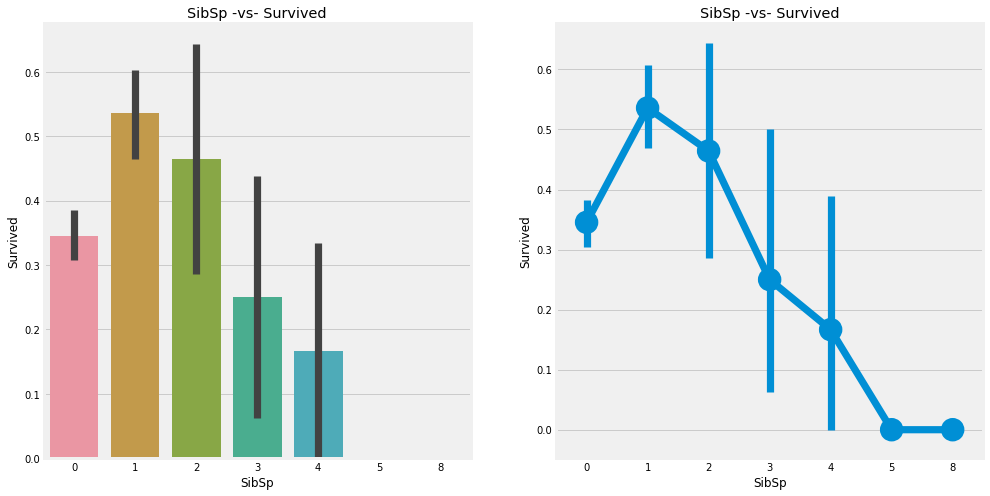

In [27]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot('SibSp','Survived',data=raw_data,ax=ax[0])
ax[0].set_title('SibSp -vs- Survived')
sns.factorplot('SibSp','Survived',data=raw_data,ax=ax[1])
ax[1].set_title('SibSp -vs- Survived')
plt.close(2)
plt.show()

Observation: <br>
<br>
Let's start with passengers travelling with at least 1 Sibling or Spouse. They have a highest survivability. May be Viktor Frankl's theory is right that People find a meaning to survive when they have a loved ones. <br>

But as the family size increases we see that the survivability goes down. Possibly because they were tryingto save the other members.

In [28]:
pd.crosstab([raw_data.SibSp,raw_data.Survived],raw_data.Pclass)

Pclass           1   2    3
SibSp Survived             
0     0         60  70  268
      1         77  50   83
1     0         18  23   56
      1         53  32   27
2     0          1   4   10
      1          4   4    5
3     0          1   0   11
      1          2   1    1
4     0          0   0   15
      1          0   0    3
5     0          0   0    5
8     0          0   0    7

From the factor plot it was preety apart that no-one with SibSp > 5 survived. It also owes to the factor that all of them belonged to Pclass 3.

<b> ParCh </b>

In [29]:
pd.crosstab([raw_data.Parch,raw_data.Survived],raw_data.Pclass)

Pclass           1   2    3
Parch Survived             
0     0         64  86  295
      1         99  48   86
1     0         10   8   35
      1         21  24   20
2     0          5   3   32
      1         16  13   11
3     0          0   0    2
      1          0   2    1
4     0          1   0    3
5     0          0   0    4
      1          0   0    1
6     0          0   0    1

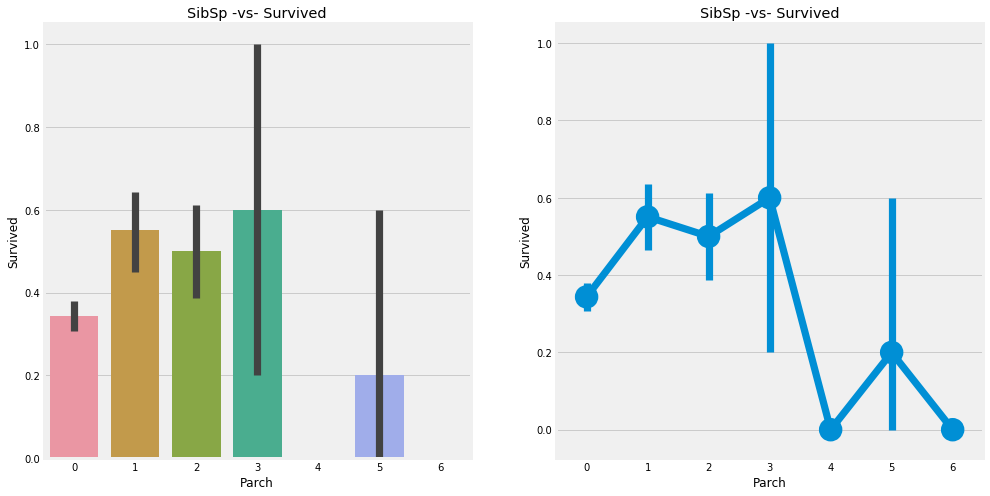

In [30]:
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.barplot('Parch','Survived',data=raw_data,ax=ax[0])
ax[0].set_title('SibSp -vs- Survived')
sns.factorplot('Parch','Survived',data=raw_data,ax=ax[1])
ax[1].set_title('SibSp -vs- Survived')
plt.close(2)
plt.show()

<b>Observations:</b><br>
Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.<br>

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

<b> Fare </b>

In [31]:
print('Maximum Fare paid: '+str(raw_data['Fare'].max()))
print('Minimum Fare paid: '+str(raw_data['Fare'].min()))
print('Average Fare paid: '+str(raw_data['Fare'].mean()))

Maximum Fare paid: 512.3292
Minimum Fare paid: 0.0
Average Fare paid: 32.2042079685746


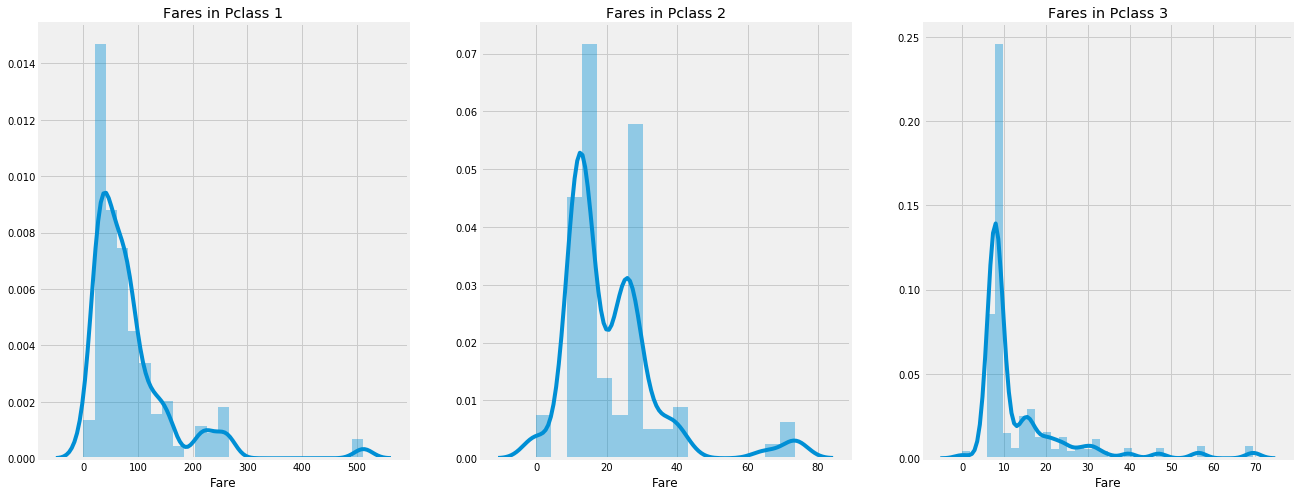

In [32]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(raw_data[raw_data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(raw_data[raw_data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(raw_data[raw_data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Looks fancy, but in reality I need to study a bit more about distributions. Just one thing to note is that PClass2 has a bimodal Fare distribution.


<b>Observations in a Nutshell for all features:</b><br>
<b>Sex:</b> The chance of survival for women is high as compared to men.

<b>Pclass:</b>There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

<b>Age:</b> Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

<b>Embarked:</b> This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

<b>Parch+SibSp:</b> Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

<b> Correlation between Features : </b>

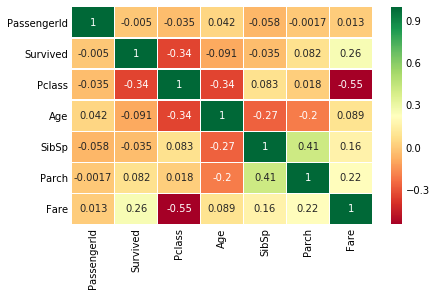

In [33]:
sns.heatmap(raw_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
plt.show()

There are very few strong correlation among features. Strong positive and negative correlation among Fare-Pclass and Parch-SibSp.

# Part2: Feature Engineering and Transformations

<b> Age Band </b>

In [34]:
raw_data['Age_Group']=0
raw_data['Age_Group']=np.where(raw_data['Age']<=16,0,np.nan)
raw_data['Age_Group']=np.where(((raw_data['Age']>16)&(raw_data['Age']<=32)),1,raw_data['Age_Group'])
raw_data['Age_Group']=np.where(((raw_data['Age']>32)&(raw_data['Age']<=48)),2,raw_data['Age_Group'])
raw_data['Age_Group']=np.where(((raw_data['Age']>48)&(raw_data['Age']<=64)),3,raw_data['Age_Group'])
raw_data['Age_Group']=np.where(raw_data['Age']>64,4,raw_data['Age_Group'])

In [35]:
raw_data['Age_Group'].value_counts().sort_values(ascending=True)

4.0     11
3.0     69
0.0    104
2.0    325
1.0    382
Name: Age_Group, dtype: int64

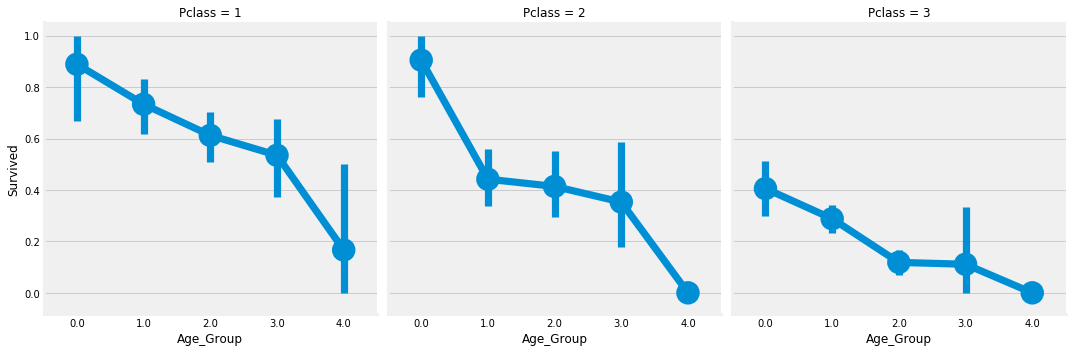

In [36]:
sns.factorplot('Age_Group','Survived',data=raw_data,col='Pclass')
plt.show()

It's clear that with increase in age the likelihood to survive decreases irrespective of PClass

<b> Family_Size </b>

In [37]:
raw_data['Family_Size']=raw_data['SibSp']+raw_data['Parch']
raw_data['Alone']=np.where(raw_data['Family_Size']==0,1,0)


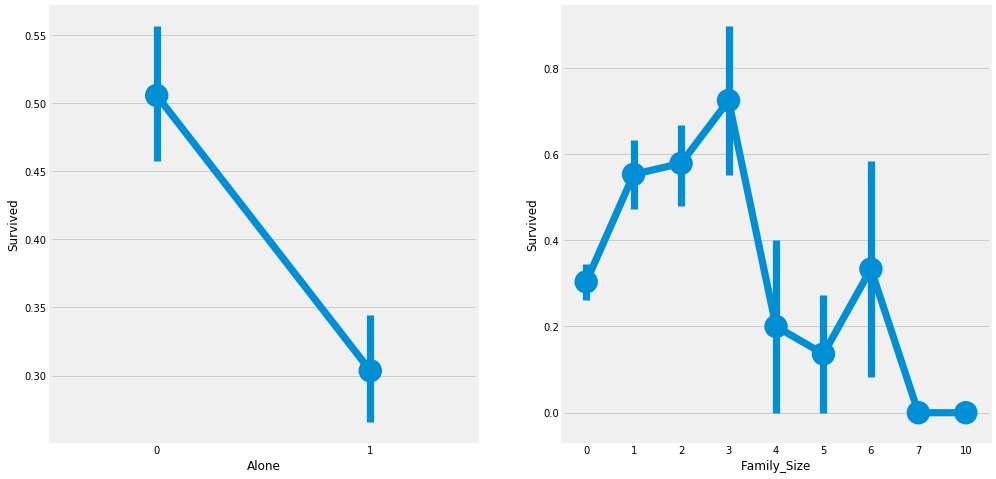

In [38]:
f,ax = plt.subplots(1,2,figsize=(15,8))
sns.factorplot('Alone','Survived',data=raw_data,ax=ax[0])
sns.factorplot('Family_Size','Survived',data=raw_data,ax=ax[1])
plt.close(2)
plt.close(3)
plt.show()

Family_Size=0 means that the passeneger is alone. Clearly, if you are alone or family_size=0,then chances for survival is very low. For family size > 4,the chances decrease too. This also looks to be an important feature for the model. Lets examine this further.

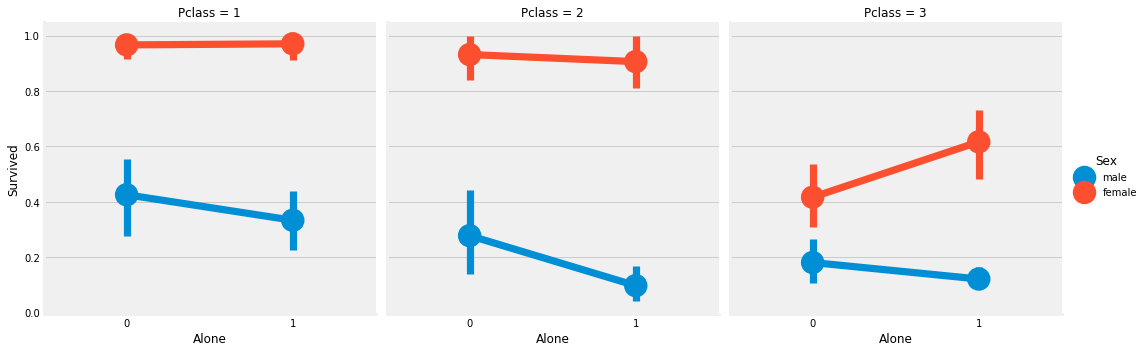

In [39]:
sns.factorplot('Alone','Survived',data=raw_data,hue='Sex',col='Pclass')
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

<b> Fare Range </b>

In [40]:
raw_data['Fare_Range']=pd.qcut(raw_data['Fare'],4)

In [41]:
raw_data.groupby(['Fare_Range'])['Survived'].mean()

Fare_Range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

Let's convert every range to Fare_Cat

In [42]:
raw_data['Fare_Cat'] = np.where((raw_data['Fare']<=7.91),0,np.nan)
raw_data['Fare_Cat'] = np.where(((raw_data['Fare']>7.91)&(raw_data['Fare']<=14.454)),1,raw_data['Fare_Cat'])
raw_data['Fare_Cat'] = np.where(((raw_data['Fare']>14.454)&(raw_data['Fare']<=31.0)),2,raw_data['Fare_Cat'])
raw_data['Fare_Cat'] = np.where(((raw_data['Fare']>31.0)&(raw_data['Fare']<=513)),3,raw_data['Fare_Cat'])

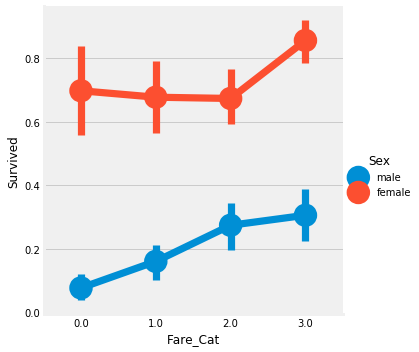

In [43]:
sns.factorplot('Fare_Cat','Survived',data=raw_data,hue='Sex')
plt.show()

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

### Converting String Values into Numeric
<br>
Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [44]:
raw_data['Sex'].replace(['male','female'],[0,1],inplace=True)
raw_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
raw_data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#### Dropping UnNeeded Features:<br>
<br>
<b>Name:</b> We don't need name feature as it cannot be converted into any categorical value.

<b>Age:</b> We have the Age_band feature, so no need of this.

<b>Ticket:</b> It is any random string that cannot be categorised.

<b>Fare:</b> We have the Fare_cat feature, so unneeded

<b>Cabin:</b> A lot of NaN values and also many passengers have multiple cabins. So this is a useless feature.

<b>Fare_Range:</b> We have the fare_cat feature.

<b>PassengerId:</b> Cannot be categorised.

In [45]:
raw_data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

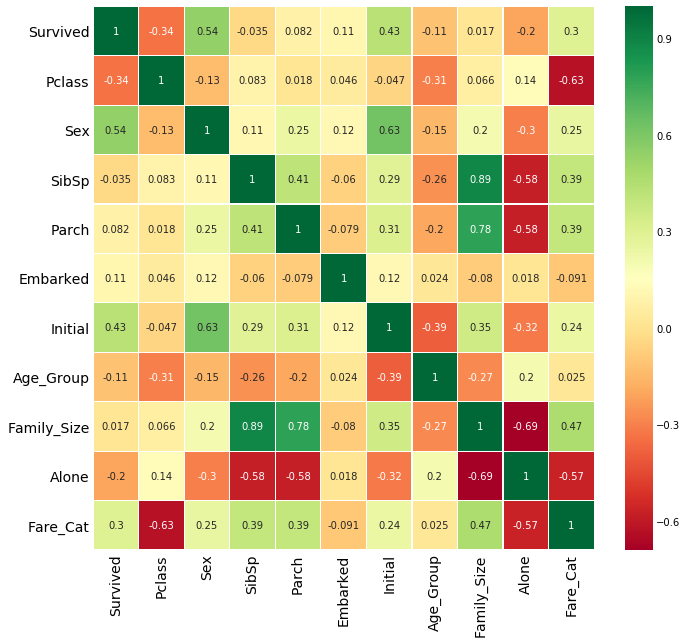

In [46]:
sns.heatmap(raw_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part 3: Predictive Modelling

In [47]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [48]:
train,test=train_test_split(raw_data,test_size=0.3,random_state=0,stratify=raw_data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=raw_data[raw_data.columns[1:]]
Y=raw_data['Survived']


<b>Logistic Regression<b>

In [49]:
lr_model = LogisticRegression()
lr_model.fit(train_X,train_Y)
lr_predict = lr_model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(lr_predict,test_Y))

The accuracy of the Logistic Regression is 0.8171641791044776


<b> KNN </b>

In [51]:
knn_model = KNeighborsClassifier()
knn_model.fit(train_X,train_Y)
knn_predict = knn_model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(knn_predict,test_Y))

The accuracy of the KNN is 0.832089552238806


In [68]:
for i in list(range(1,100)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=metrics.accuracy_score(prediction,test_Y)
    print('n_neighbour = '+str(i)+' '+str(a))

n_neighbour = 1 0.7574626865671642
n_neighbour = 2 0.7910447761194029
n_neighbour = 3 0.8097014925373134
n_neighbour = 4 0.8022388059701493
n_neighbour = 5 0.832089552238806
n_neighbour = 6 0.8171641791044776
n_neighbour = 7 0.8283582089552238
n_neighbour = 8 0.832089552238806
n_neighbour = 9 0.835820895522388
n_neighbour = 10 0.832089552238806
n_neighbour = 11 0.8507462686567164
n_neighbour = 12 0.832089552238806
n_neighbour = 13 0.832089552238806
n_neighbour = 14 0.8432835820895522
n_neighbour = 15 0.8432835820895522
n_neighbour = 16 0.8283582089552238
n_neighbour = 17 0.8246268656716418
n_neighbour = 18 0.8134328358208955
n_neighbour = 19 0.8134328358208955
n_neighbour = 20 0.8134328358208955
n_neighbour = 21 0.8097014925373134
n_neighbour = 22 0.8097014925373134
n_neighbour = 23 0.8246268656716418
n_neighbour = 24 0.8059701492537313
n_neighbour = 25 0.8134328358208955
n_neighbour = 26 0.8097014925373134
n_neighbour = 27 0.8059701492537313
n_neighbour = 28 0.8097014925373134
n_neigh

In [69]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(train_X,train_Y)
knn_predict = knn_model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(knn_predict,test_Y))

The accuracy of the KNN is 0.8507462686567164


<b> SVM </b>

In [62]:
svm_model_lr = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
svm_model_lr.fit(train_X,train_Y)
svm_predict_lr = svm_model_lr.predict(test_X)
print('The accuracy of the linear SVM is',metrics.accuracy_score(svm_predict_lr,test_Y))

The accuracy of the linear SVM is 0.8171641791044776


In [63]:
svm_model_rbf = svm.SVC(kernel='rbf',C=0.1,gamma=0.1)
svm_model_rbf.fit(train_X,train_Y)
svm_predict_rbf = svm_model_rbf.predict(test_X)
print('The accuracy of the radial SVM is',metrics.accuracy_score(svm_predict_rbf,test_Y))

The accuracy of the radial SVM is 0.832089552238806


<b> Decision Tree </b>

In [65]:
dt_model = DecisionTreeClassifier()
dt_model.fit(train_X,train_Y)
dt_predict = dt_model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(dt_predict,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


<b> Random Forest </b>

In [66]:
rf_model = RandomForestClassifier()
rf_model.fit(train_X,train_Y)
rf_predict = rf_model.predict(test_X)
print('The accuracy of the Random Forest is',metrics.accuracy_score(rf_predict,test_Y))

The accuracy of the Decision Tree is 0.7985074626865671


In [76]:
a=pd.Series()
for i in list(range(1,100)):
    model=RandomForestClassifier(n_estimators=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
print(a.max())

0.8283582089552238


<b> Cross Validation </b>

In [77]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=11),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.817154,0.046062
Decision Tree,0.808090,0.028991
Naive Bayes,0.801386,0.028999
Random Forest,0.812609,0.033835


<b> Confusion Matrices </b>

In [80]:
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=11),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for m in models:
    m.fit(train_X,train_Y)
    pred = m.predict(test_X)
    ctab = pd.DataFrame(pd.crosstab(test_Y['Survived'],pred))
    print(ctab)
    print(m)
    print('='*100)

col_0       0   1
Survived         
0         143  22
1          32  71
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
col_0       0   1
Survived         
0         151  14
1          30  73
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
col_0       0   1
Survived         
0         147  18
1          31  72
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
col_0       0   1
Survived         
0        

<b> Hyper Parameter Tuning </b>

In [81]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   11.8s finished
